In [2]:
import pandas as pd

batting = pd.read_csv("BATTING.csv", encoding="latin1")


In [3]:
batting.head()

,BATTING,DISMISSAL,RUNS,BALLS,MINUTES,FOURS,SIXES,STRICK RATE,BATTING_POSITION,MATCH_ID,MATCH,BATTING_TEAM
0,Jonny Bairstow,c Mitchell b Santner,33,35,57,4,1,94.28,1,ODI # 4658,England-vs-New-Zealand,England
1,Dawid Malan,c wk Latham b Henry,14,24,36,2,0,58.33,2,ODI # 4658,England-vs-New-Zealand,England
2,Joe Root,b Phillips,77,86,140,4,1,89.53,3,ODI # 4658,England-vs-New-Zealand,England
3,Harry Brook,c Conway b Ravindra,25,16,20,4,1,156.25,4,ODI # 4658,England-vs-New-Zealand,England
4,Moeen Ali,b Phillips,11,17,20,1,0,64.7,5,ODI # 4658,England-vs-New-Zealand,England


In [4]:
batting.columns = batting.columns.str.lower().str.replace(" ", "_")

In [5]:
numeric_cols = ['runs', 'balls', 'minutes', 'fours', 'sixes', 'strick_rate']

for col in numeric_cols:
    batting[col] = pd.to_numeric(batting[col], errors='coerce')


In [6]:
batting.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   batting           876 non-null    object 
 1   dismissal         876 non-null    object 
 2   runs              875 non-null    float64
 3   balls             875 non-null    float64
 4   minutes           875 non-null    float64
 5   fours             875 non-null    float64
 6   sixes             875 non-null    float64
 7   strick_rate       871 non-null    float64
 8   batting_position  876 non-null    int64  
 9   match_id          876 non-null    object 
 10  match             876 non-null    object 
 11  batting_team      876 non-null    object 
dtypes: float64(6), int64(1), object(5)
memory usage: 82.3+ KB


In [7]:
batting.head()

,batting,dismissal,runs,balls,minutes,fours,sixes,strick_rate,batting_position,match_id,match,batting_team
0,Jonny Bairstow,c Mitchell b Santner,33.0,35.0,57.0,4.0,1.0,94.28,1,ODI # 4658,England-vs-New-Zealand,England
1,Dawid Malan,c wk Latham b Henry,14.0,24.0,36.0,2.0,0.0,58.33,2,ODI # 4658,England-vs-New-Zealand,England
2,Joe Root,b Phillips,77.0,86.0,140.0,4.0,1.0,89.53,3,ODI # 4658,England-vs-New-Zealand,England
3,Harry Brook,c Conway b Ravindra,25.0,16.0,20.0,4.0,1.0,156.25,4,ODI # 4658,England-vs-New-Zealand,England
4,Moeen Ali,b Phillips,11.0,17.0,20.0,1.0,0.0,64.70,5,ODI # 4658,England-vs-New-Zealand,England


In [8]:
batting[['runs','balls','minutes','fours','sixes','strick_rate']] = (
    batting[['runs','balls','minutes','fours','sixes','strick_rate']].fillna(0)
)


In [22]:
top_scorers = (
    batting
    .groupby('batting')['runs']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_scorers


batting
Virat Kohli            765.0
Quinton de Kock wk     594.0
Rachin Ravindra        578.0
Daryl Mitchell         552.0
Rohit Sharma(c)        550.0
Name: runs, dtype: float64

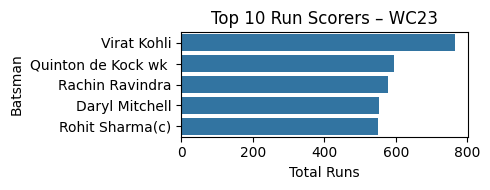

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# convert series to dataframe for seaborn
top_scorers_df = top_scorers.reset_index()
top_scorers_df.columns = ["Player", "Runs"]

plt.figure(figsize=(5, 2))
sns.barplot(
    x="Runs",
    y="Player",
    data=top_scorers_df
)

plt.title("Top 10 Run Scorers – WC23")
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.tight_layout()
plt.show()


In [28]:
runs_per_match = (
    batting
    .groupby('batting')
    .agg(
        total_runs=('runs', 'sum'),
        matches=('match_id', 'nunique')
    )
)

runs_per_match['runs_per_match'] = (
    runs_per_match['total_runs'] / runs_per_match['matches']
)

runs_per_match[runs_per_match['matches'] >= 5] \
    .sort_values('runs_per_match', ascending=False) \
    .head(5)


,total_runs,matches,runs_per_match
batting,,,
Virat Kohli,765.0,11,69.545455
Daryl Mitchell,552.0,9,61.333333
Quinton de Kock wk,594.0,10,59.400000
Rachin Ravindra,578.0,10,57.800000
Rohit Sharma(c),550.0,10,55.000000


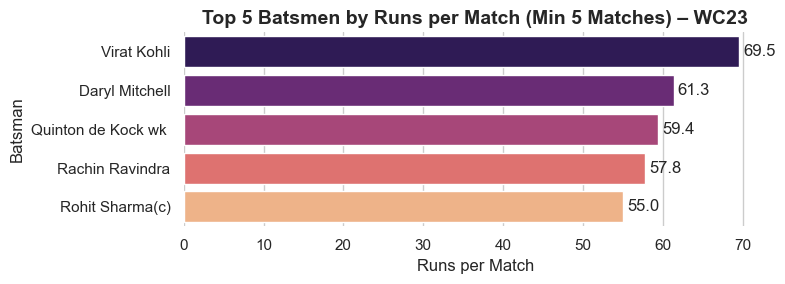

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

rpm_top5 = (
    runs_per_match[runs_per_match['matches'] >= 5]
    .sort_values('runs_per_match', ascending=False)
    .head(5)
    .reset_index()
)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 3))

ax = sns.barplot(
    x="runs_per_match",
    y="batting",
    hue="batting",         
    data=rpm_top5,
    palette="magma",
    legend=False            
)

ax.set_title(
    "Top 5 Batsmen by Runs per Match (Min 5 Matches) – WC23",
    fontsize=14,
    weight="bold"
)
ax.set_xlabel("Runs per Match")
ax.set_ylabel("Batsman")

# Value labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", padding=3)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


In [34]:
sr_runs = (
    batting
    .groupby('batting')
    .agg(
        total_runs=('runs', 'sum'),
        avg_strike_rate=('strick_rate', 'mean'),
        matches=('match_id', 'nunique')
    )
    .query("matches >= 5 and total_runs >= 200")
    .sort_values('avg_strike_rate', ascending=False)
    .head(5)
)

sr_runs


,total_runs,avg_strike_rate,matches
batting,,,
Aiden Markram,304.0,166.606250,8
Rohit Sharma(c),550.0,125.526000,10
David Miller,356.0,123.346000,10
Heinrich Klaasen,373.0,123.195000,10
David Warner,535.0,119.574545,11


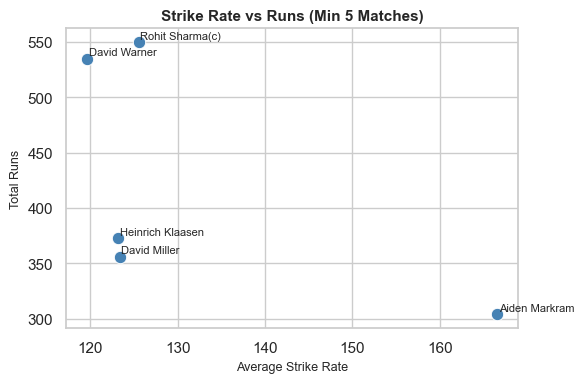

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
sr_top5 = sr_runs.reset_index()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 4))   # 👈 small size

ax = sns.scatterplot(
    data=sr_top5,
    x="avg_strike_rate",
    y="total_runs",
    color="steelblue",
    s=80
)

# Titles and labels
ax.set_title(
    "Strike Rate vs Runs (Min 5 Matches)",
    fontsize=11,
    weight="bold"
)
ax.set_xlabel("Average Strike Rate", fontsize=9)
ax.set_ylabel("Total Runs", fontsize=9)

# Player labels (clean & readable)
for _, row in sr_top5.iterrows():
    ax.text(
        row["avg_strike_rate"] + 0.2,
        row["total_runs"] + 3,
        row["batting"],
        fontsize=8
    )

plt.tight_layout()
plt.show()


In [12]:
team_batting = (
    batting
    .groupby('batting_team')
    .agg(
        total_runs=('runs', 'sum'),
        avg_strike_rate=('strick_rate', 'mean'),
        matches=('match_id', 'nunique')
    )
    .sort_values('total_runs', ascending=False)
)

team_batting


,total_runs,avg_strike_rate,matches
batting_team,,,
India,3038.0,97.054026,11
Australia,2945.0,87.027800,11
South-Africa,2773.0,96.231011,10
New-Zealand,2712.0,93.575833,10
Pakistan,2220.0,84.369221,9
England,2135.0,88.504444,9
Afghanistan,1990.0,76.613067,9
Bangladesh,1944.0,72.991889,9
Sri-Lanka,1942.0,64.495632,9


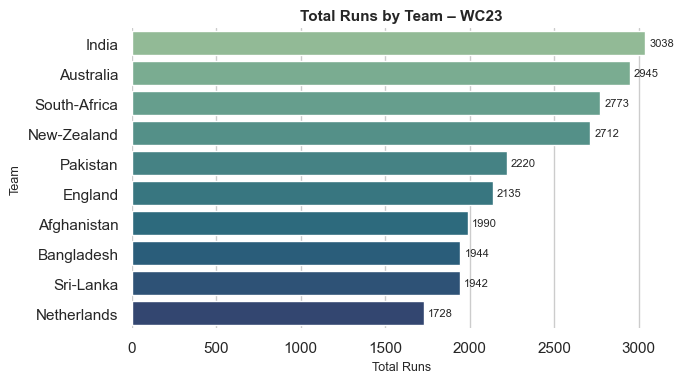

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
team_batting_df = team_batting.reset_index()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 4))   # 👈 small & neat

ax = sns.barplot(
    x="total_runs",
    y="batting_team",
    hue="batting_team",      # future-proof
    data=team_batting_df,
    palette="crest",
    legend=False
)

# Titles and labels
ax.set_title(
    "Total Runs by Team – WC23",
    fontsize=11,
    weight="bold"
)
ax.set_xlabel("Total Runs", fontsize=9)
ax.set_ylabel("Team", fontsize=9)

# Value labels
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=8)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


In [13]:
position_runs = (
    batting
    .groupby('batting_position')['runs']
    .sum()
    .sort_values(ascending=False)
)

position_runs


batting_position
3     4028.0
4     3906.0
1     3503.0
2     3330.0
5     2595.0
6     2200.0
7     1615.0
8      854.0
9      747.0
10     455.0
11     194.0
Name: runs, dtype: float64

In [14]:
boundary_stats = (
    batting
    .groupby('batting')
    .agg(
        fours=('fours', 'sum'),
        sixes=('sixes', 'sum')
    )
)

boundary_stats['total_boundaries'] = (
    boundary_stats['fours'] + boundary_stats['sixes']
)

boundary_stats.sort_values('total_boundaries', ascending=False).head(10)


,fours,sixes,total_boundaries
batting,,,
Rohit Sharma(c),62.0,28.0,90.0
Quinton de Kock wk,57.0,21.0,78.0
Virat Kohli,68.0,9.0,77.0
David Warner,50.0,24.0,74.0
Rachin Ravindra,55.0,17.0,72.0
Daryl Mitchell,48.0,22.0,70.0
Mitchell Marsh,43.0,21.0,64.0
Glenn Maxwell,40.0,22.0,62.0
Shreyas Iyer,37.0,24.0,61.0


In [15]:
balls_per_match = (
    batting
    .groupby('batting')
    .agg(
        total_balls=('balls', 'sum'),
        matches=('match_id', 'nunique')
    )
)

balls_per_match = balls_per_match[balls_per_match['matches'] >= 5]

balls_per_match['balls_faced_per_match'] = (
    balls_per_match['total_balls'] / balls_per_match['matches']
)

balls_per_match.sort_values('balls_faced_per_match', ascending=False).head(10)


,total_balls,matches,balls_faced_per_match
batting,,,
Virat Kohli,847.0,11,77.000000
Ben Stokes,341.0,6,56.833333
Sybrand Engelbrecht,450.0,8,56.250000
Quinton de Kock wk,555.0,10,55.500000
Daryl Mitchell,497.0,9,55.222222
Ibrahim Zadran,493.0,9,54.777778
Rachin Ravindra,543.0,10,54.300000
Rassie van der Dussen,530.0,10,53.000000
Mohammad Rizwan wk,414.0,8,51.750000


In [16]:
batting_rating = (
    batting
    .groupby('batting')
    .agg(
        runs=('runs', 'sum'),
        strike_rate=('strick_rate', 'mean'),
        sixes=('sixes', 'sum'),
        fours=('fours', 'sum'),
        minutes=('minutes', 'sum'),
        balls=('balls', 'sum'),
        matches=('match_id', 'nunique')
    )
)

batting_rating = batting_rating[batting_rating['matches'] >= 5]


In [17]:
for col in ['runs', 'strike_rate', 'sixes', 'fours', 'minutes', 'balls']:
    batting_rating[col + '_n'] = (
        batting_rating[col] - batting_rating[col].min()
    ) / (
        batting_rating[col].max() - batting_rating[col].min()
    )


In [18]:
batting_rating['batting_rating'] = (
    0.35 * batting_rating['runs_n'] +
    0.25 * batting_rating['strike_rate_n'] +
    0.15 * batting_rating['sixes_n'] +
    0.15 * batting_rating['fours_n'] +
    0.05 * batting_rating['minutes_n'] +
    0.05 * batting_rating['balls_n']
)


In [19]:
batting_rating.sort_values('batting_rating', ascending=False).head(5)


,runs,strike_rate,sixes,fours,minutes,balls,matches,runs_n,strike_rate_n,sixes_n,fours_n,minutes_n,balls_n,batting_rating
batting,,,,,,,,,,,,,,
Rohit Sharma(c),550.0,125.526000,28.0,62.0,617.0,443.0,10,0.717477,0.675536,1.000000,0.911765,0.511804,0.520190,0.758365
Virat Kohli,765.0,83.206364,9.0,68.0,1196.0,847.0,11,1.000000,0.341283,0.321429,1.000000,1.000000,1.000000,0.733535
Quinton de Kock wk,594.0,106.539000,21.0,57.0,799.0,555.0,10,0.775296,0.525571,0.750000,0.838235,0.665261,0.653207,0.706905
David Warner,535.0,119.574545,24.0,50.0,764.0,494.0,11,0.697766,0.628530,0.857143,0.735294,0.635750,0.580760,0.701042
Daryl Mitchell,552.0,105.542222,22.0,48.0,724.0,497.0,9,0.720105,0.517698,0.785714,0.705882,0.602024,0.584323,0.664518


In [20]:
india_players = batting[batting['batting_team'] == 'India']['batting'].unique()

india_batting_rating = (
    batting_rating
    .loc[batting_rating.index.isin(india_players)]
    .sort_values('batting_rating', ascending=False)
    .head(10)
)

india_batting_rating


,runs,strike_rate,sixes,fours,minutes,balls,matches,runs_n,strike_rate_n,sixes_n,fours_n,minutes_n,balls_n,batting_rating
batting,,,,,,,,,,,,,,
Rohit Sharma(c),550.0,125.526000,28.0,62.0,617.0,443.0,10,0.717477,0.675536,1.000000,0.911765,0.511804,0.520190,0.758365
Virat Kohli,765.0,83.206364,9.0,68.0,1196.0,847.0,11,1.000000,0.341283,0.321429,1.000000,1.000000,1.000000,0.733535
Shreyas Iyer,530.0,96.670909,24.0,37.0,651.0,468.0,11,0.691196,0.447630,0.857143,0.544118,0.540472,0.549881,0.618533
Shubman Gill,354.0,103.162222,12.0,41.0,538.0,331.0,9,0.459921,0.498900,0.428571,0.602941,0.445194,0.387173,0.482043
KL Rahul wk,386.0,100.685556,9.0,37.0,567.0,391.0,9,0.501971,0.479339,0.321429,0.544118,0.469646,0.458432,0.471760
Ravindra Jadeja,120.0,106.044000,3.0,7.0,172.0,118.0,5,0.152431,0.521661,0.107143,0.102941,0.136594,0.134204,0.228819
Suryakumar Yadav,106.0,108.428571,1.0,12.0,175.0,105.0,7,0.134034,0.540495,0.035714,0.176471,0.139123,0.118765,0.226758


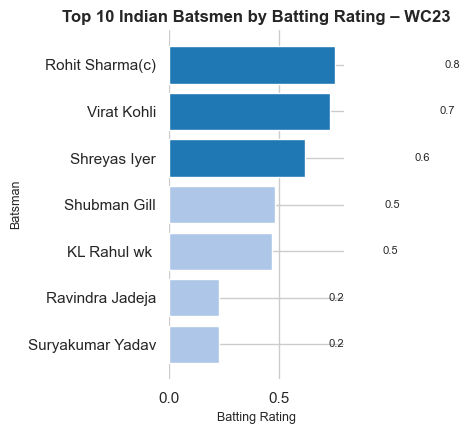

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare clean dataframe
india_df = (
    india_batting_rating
    .reset_index()[["batting", "batting_rating"]]
)
india_df.columns = ["Player", "Batting_Rating"]

sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 4.5))

# Highlight top 3
colors = ["#1f77b4" if i < 3 else "#aec7e8" for i in range(len(india_df))]

plt.barh(
    india_df["Player"],
    india_df["Batting_Rating"],
    color=colors
)

plt.gca().invert_yaxis()

plt.title(
    "Top 10 Indian Batsmen by Batting Rating – WC23",
    fontsize=12,
    weight="bold"
)
plt.xlabel("Batting Rating", fontsize=9)
plt.ylabel("Batsman", fontsize=9)

# Value labels
for i, value in enumerate(india_df["Batting_Rating"]):
    plt.text(value + 0.5, i, f"{value:.1f}", va="center", fontsize=8)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

